In [1]:
#Load necessary library and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load data set

pca_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
pca_data.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0


In [4]:
#filter for swiss and Czech data
filter1 = pca_data['cntry'] == 'CZ'
filter2 = pca_data['cntry'] == 'CH'
filter3 = pca_data['year'] == 6
selectec_col = ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
filter4 = filter1 | filter2 & filter3
dta_pca = pca_data.loc[filter4, selectec_col].dropna()
dta_pca.head()

,tvtot,ppltrst,pplfair,pplhlp
0,3.0,3.0,10.0,5.0
1,6.0,5.0,7.0,5.0
2,1.0,8.0,8.0,8.0
3,4.0,6.0,6.0,7.0
4,5.0,6.0,7.0,5.0


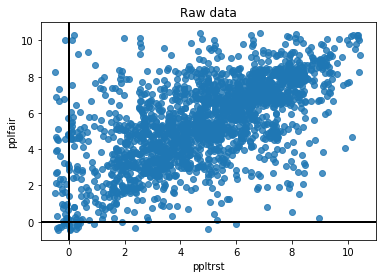

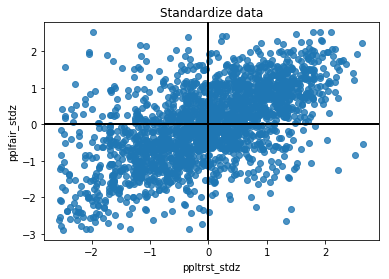

In [6]:
#plot undstandardized variable 
p = sns.regplot('ppltrst', 'pplfair', dta_pca,x_jitter=.49,y_jitter=.49,fit_reg=False)
p.set(xlim=(-1,11), ylim =(-1, 11))
p.axhline(0,color='k', linestyle='-', linewidth=2)
p.axvline(0, color='k', linestyle='-', linewidth=2)
p.axes.set_title('Raw data')
plt.show()

#standardize and plot columns ppltrst & pplfair
dta_pca['ppltrst_stdz'] = (dta_pca['ppltrst'] - dta_pca['ppltrst'].mean()) / dta_pca['ppltrst'].std()
dta_pca['pplfair_stdz'] = (dta_pca['pplfair'] - dta_pca['pplfair'].mean()) / dta_pca['pplfair'].std()

#plot standardize columns
t = sns.regplot('ppltrst_stdz', 'pplfair_stdz', dta_pca, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-',linewidth=2)
t.axvline(0,color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardize data')
plt.show()

In [11]:
#compute covariancec
cov_data = dta_pca.drop(['ppltrst_stdz', 'pplfair_stdz'], axis= 'columns')

# normalize data so that all variable has a mean of 0 and stardard deviation of 1
X = StandardScaler().fit_transform(cov_data)

# the standardize data frame need to be tanspose before numpy can process covariance

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n',Cx)


Covariance Matrix:
 [[ 1.0004852  -0.21449876 -0.20888357 -0.15356308]
 [-0.21449876  1.0004852   0.6249786   0.53884111]
 [-0.20888357  0.6249786   1.0004852   0.56454219]
 [-0.15356308  0.53884111  0.56454219  1.0004852 ]]


In [16]:
#calculate Eigenvector and Eigenvalue
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

#inspect the eigenvector and eigenvalue
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')
print('The percentage of total variance in dataset explained component calculated by hand. \n', eig_val_cov/sum(eig_val_cov))
    

Eigenvector 1: 
[[-0.25969631]
 [ 0.56455576]
 [ 0.57115454]
 [ 0.53629946]]
Eigenvalue 1: 2.2433103518010875
----------------------------------------
Eigenvector 2: 
[[0.96164644]
 [0.10627933]
 [0.12673861]
 [0.21881075]]
Eigenvalue 2: 0.9143083629331712
----------------------------------------
Eigenvector 3: 
[[-0.08828197]
 [-0.50659608]
 [-0.29542633]
 [ 0.80516457]]
Eigenvalue 3: 0.4711541963442035
----------------------------------------
Eigenvector 4: 
[[ 4.87462693e-04]
 [-6.42916720e-01]
 [ 7.55276833e-01]
 [-1.27337187e-01]]
Eigenvalue 4: 0.37316789435578673
----------------------------------------
The percentage of total variance in dataset explained component calculated by hand. 
 [0.56055561 0.22846624 0.11773143 0.09324673]


In [21]:

P = eig_vec_cov[:,0]
Y = P.T.dot(Xt)
Y

array([ 0.8878343 ,  0.22894715,  2.54043926, ..., -0.61668603,
       -0.16258102,  0.20474889])

In [23]:
# caculate PCA with sklearn library

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.8878343 ,  0.38932493,  0.12784784,  2.05128878],
       [ 0.22894715, -0.89005893,  0.28412879,  0.48654744],
       [ 2.54043926,  0.88949785, -0.23154101, -0.16539552],
       ...,
       [-0.61668603, -1.04840002,  1.41150203,  0.6584891 ],
       [-0.16258102, -0.32260585, -0.0233437 , -0.19334214],
       [ 0.20474889,  1.03760413, -0.14821498, -0.19403163]])